In [1]:
#imports
%matplotlib notebook
import h5py
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
# load file
filename = 'data/larndsim_test1.h5'
f = h5py.File(filename, 'r')

# file datasets
f.keys()

<KeysViewHDF5 ['_header', 'configs', 'mc_packets_assn', 'messages', 'packets', 'tracks']>

In [3]:
# information included in packets
f['packets'].dtype

dtype([('io_group', 'u1'), ('io_channel', 'u1'), ('chip_id', 'u1'), ('packet_type', 'u1'), ('downstream_marker', 'u1'), ('parity', 'u1'), ('valid_parity', 'u1'), ('channel_id', 'u1'), ('timestamp', '<u8'), ('dataword', 'u1'), ('trigger_type', 'u1'), ('local_fifo', 'u1'), ('shared_fifo', 'u1'), ('register_address', 'u1'), ('register_data', 'u1'), ('direction', 'u1'), ('local_fifo_events', 'u1'), ('shared_fifo_events', '<u2'), ('counter', '<u4'), ('fifo_diagnostics_enabled', 'u1'), ('first_packet', 'u1'), ('receipt_timestamp', '<u4')])

In [4]:
# show packet contents in dataframe
df = pd.DataFrame(np.array(f['packets']))
df

,io_group,io_channel,chip_id,packet_type,downstream_marker,parity,valid_parity,channel_id,timestamp,dataword,...,shared_fifo,register_address,register_data,direction,local_fifo_events,shared_fifo_events,counter,fifo_diagnostics_enabled,first_packet,receipt_timestamp
0,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,26,49,0,0,0,1,59,5465,81,...,0,123,86,0,0,0,0,0,1,0
4,1,26,49,0,0,1,1,50,1754,102,...,0,178,182,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28347,2,22,40,0,0,0,1,33,595910,83,...,0,161,241,0,0,0,0,0,1,0
28348,2,22,40,0,0,0,1,34,595893,107,...,0,98,237,0,0,0,0,0,1,0
28349,2,22,40,0,0,0,1,34,595917,94,...,0,98,243,0,0,0,0,0,1,0
28350,2,22,40,0,0,1,1,37,595911,103,...,0,229,241,0,0,0,0,0,1,0


In [5]:
# make selections
df[(df['packet_type'] == 7) | (df['channel_id'] == 53)]

,io_group,io_channel,chip_id,packet_type,downstream_marker,parity,valid_parity,channel_id,timestamp,dataword,...,shared_fifo,register_address,register_data,direction,local_fifo_events,shared_fifo_events,counter,fifo_diagnostics_enabled,first_packet,receipt_timestamp
1,1,0,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,1,30,39,0,0,0,1,53,1918,103,...,0,181,223,0,0,0,0,0,1,0
100,2,29,59,0,0,1,1,53,1730,97,...,0,181,176,0,0,0,0,0,1,0
241,1,0,0,7,0,0,0,0,6000,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27869,2,29,38,0,0,0,1,53,589869,97,...,0,117,11,0,0,0,0,0,1,0
28039,1,0,0,7,0,0,0,0,594000,0,...,0,0,0,0,0,0,0,0,0,0
28040,2,0,0,7,0,0,0,0,594000,0,...,0,0,0,0,0,0,0,0,0,0
28097,2,29,29,0,0,1,1,53,595707,100,...,0,245,190,0,0,0,0,0,1,0


In [6]:
evd_filename = 'data/larndsim_test_evd1.h5'
evd_f = h5py.File(evd_filename)

print(evd_f.keys())

events = evd_f['events']
hits = evd_f['hits']
tracks = evd_f['tracks']

event_list = []
track_list = []

# loop through events    
for i,ev in enumerate(events):
    event_dict = {}
    hit_ref = ev['hit_ref']
    track_ref = ev['track_ref']
    event_dict['id'] = ev['evid']
    event_dict['xyzq'] = list(zip(hits[hit_ref]['px'], hits[hit_ref]['py'], (hits[hit_ref]['ts'] - ev['ts_start']), hits[hit_ref]['q']))
    #event_dict['x'] = hits[hit_ref]['px']
    #event_dict['y'] = hits[hit_ref]['py']
    #event_dict['z'] = hits[hit_ref]['ts'] - ev['ts_start']
    #event_dict['q'] = hits[hit_ref]['q']
    event_dict['total_q'] = ev['q']
    event_list.append(event_dict)
    
    # loop through tracks in event
    for j, trck in enumerate(tracks[track_ref]):
        track_dict = {}
        track_dict['event_id'] = ev['evid']
        track_dict['track_id'] = trck['track_id']  
        track_hit_ref = trck['hit_ref']
        track_dict['track_hit_x'] = hits[track_hit_ref]['px']
        track_dict['track_hit_y'] = hits[track_hit_ref]['py']
        track_dict['track_hit_z'] = hits[track_hit_ref]['ts'] - ev['ts_start'] 
        track_dict['track_hit_q'] = hits[track_hit_ref]['q'] * 0.250
        track_list.append(track_dict)



<KeysViewHDF5 ['events', 'ext_trigs', 'hits', 'info', 'tracks']>


<IPython.core.display.Javascript object>


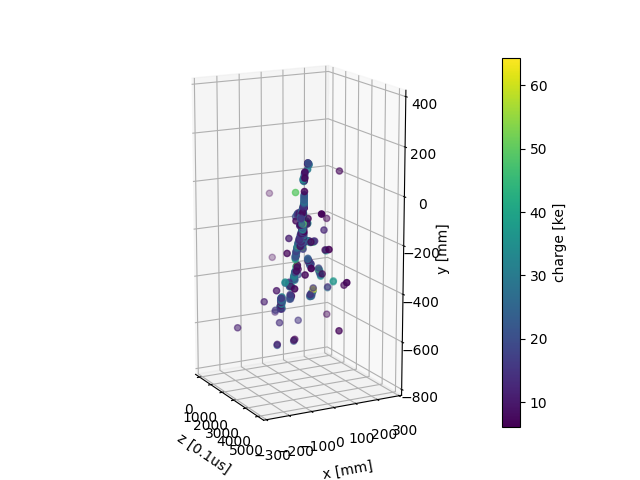

In [37]:
# event display

# choose event to plot
event_number = 16
event = events[event_number]

# get hits and tracks from selected event
hit_ref = event['hit_ref']
track_ref = event['track_ref']

x = hits[hit_ref]['px']
y = hits[hit_ref]['py']
z = hits[hit_ref]['ts'] - event['ts_start']
q = hits[hit_ref]['q'] * 0.250

# get rid of point with negative charge...
points = list(zip(x,y,z,q))
points = [pt for pt in points if pt[3] > 0]

y_sorted_points = sorted(points, key=lambda pt: pt[1], reverse=True)
initial_y_sorted_points = y_sorted_points[0:10]

x = [pt[0] for pt in points]
y = [pt[1] for pt in points]
z = [pt[2] for pt in points]
q = [pt[3] for pt in points]

x_init = [pt[0] for pt in initial_y_sorted_points]
y_init = [pt[1] for pt in initial_y_sorted_points]
z_init = [pt[2] for pt in initial_y_sorted_points]
q_init = [pt[3] for pt in initial_y_sorted_points]

### testing DBSCAN #########################################
shstart_points = list(zip(x_init, y_init, z_init, q_init))

# DBSCAN
shstart_db = DBSCAN(eps=20, min_samples=2).fit(np.array(list(zip(x_init, y_init, z_init))))                                                                                                            
shstart_labels = shstart_db.labels_                                                                                                                                       
n_shstart_clusters_ = len(set(shstart_labels)) - (1 if -1 in shstart_labels else 0) 
    
# save clusters to shstart_clusters array
shstart_points = np.array(shstart_points)                                                                                                             
shstart_clusters = [shstart_points[shstart_labels == i] for i in range(0, n_shstart_clusters_)] 

testing = list(shstart_clusters[0].tolist())
testing = [(item[0], item[1], item[2]) for item in testing]
#print(testing)
xtest,ytest,ztest = zip(*testing)
#print(xtest)
#############################################################

# plot event
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# track points
im = ax.scatter(x,y,z,c=q)
#ax.scatter(x_init, y_init, z_init, c = 'r', alpha=1)
#ax.scatter(xtest, ytest, ztest, c='black', alpha=1, zorder=100000)
plt.colorbar(im, ax=ax, label='charge [ke]', cmap='plasma')

# plotting
ax.set_xlim([-300,300])
ax.set_ylim([-800,400])
#ax.set_zlim([1000,4500])
ax.set_xlabel('x [mm]')
ax.set_ylabel('y [mm]')
ax.set_zlabel('z [0.1us]')
ax.view_init(vertical_axis='y')
ax.set_box_aspect([1,1,2])
#ax.set_box_aspect([1,1,2])
#ax.grid(False)

plt.show()


In [ ]:
# plot tracks within event
'''
# grab relevant info from selected event
selected_tracks = [track for track in track_list if track['event_id'] == event_number]
selected_tracks

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for track in selected_tracks:
    ax.scatter(track['track_hit_x'], track['track_hit_y'], track['track_hit_z'])

# plotting
ax.set_xlim([-300,300])
ax.set_ylim([-800,400])
ax.set_xlabel('x [mm]')
ax.set_ylabel('y [mm]')
ax.set_zlabel('z [0.1us]')
ax.view_init(vertical_axis='y')
ax.set_box_aspect([1,1,2])
#ax.grid(False)
plt.show()
'''

In [ ]:
# event analysis
event_list

for ev in event_list:
    ev['xyzq'] = sorted(ev['xyzq'], key=lambda k: k[1])
    ev['xyzq_init'] = ev['xyzq'][0:10]
    
#event_list[0:2]

In [ ]:
work_func = 0.0236
recomb_corr = 0.68957

def sum_energy(hits):
    hits = [pt[3] for pt in hits]
    total_energy = 0
    for hit in hits:
        hit_energy = work_func * (1/recomb_corr) * hit
        total_energy = total_energy + hit_energy
    return total_energy

print(sum_energy(event_list[event_number]['xyzq']))
print(work_func * event_list[event_number]['total_q'] / recomb_corr)